DSCI 552 Homework 1
Zeru Zhou
Github username: Zeruuuuu
USCID: 9208-8181-38

# 1. Decision Trees as Interpretable Models
## (a) Download the Accute Inflamations data 


In [391]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from skmultilearn.problem_transform import LabelPowerset
import matplotlib.pyplot as plt
from sklearn.tree import _tree
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=RuntimeWarning)
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from xgboost import XGBRegressor

In [392]:
my_df = pd.read_csv('../data/diagnosis.data', encoding = 'utf-16', sep = '\t', names=['Temperature','Nausea','Lumbar','Urine','Micturition','Urethra','Bladder','Pelvis'])
my_df

Temperature Nausea Lumbar Urine Micturition Urethra Bladder Pelvis
0          35,5     no    yes    no          no      no      no     no
1          35,9     no     no   yes         yes     yes     yes     no
2          35,9     no    yes    no          no      no      no     no
3          36,0     no     no   yes         yes     yes     yes     no
4          36,0     no    yes    no          no      no      no     no
..          ...    ...    ...   ...         ...     ...     ...    ...
115        41,4     no    yes   yes          no     yes      no    yes
116        41,5     no     no    no          no      no      no     no
117        41,5    yes    yes    no         yes      no      no    yes
118        41,5     no    yes   yes          no     yes      no    yes
119        41,5     no    yes   yes          no     yes      no    yes

[120 rows x 8 columns]

As above, the dataset is loaded.

## (b) Build a decision tree on the whole data set and plot it

In [393]:
x,y = my_df['Temperature'], my_df.drop(columns = ['Temperature'])

In [394]:
x_new = []
for i in x:
    x_new.append(float(i.replace(',','.')))

In [395]:
dt = DecisionTreeClassifier()

In [396]:
clf = dt.fit(np.array(x_new).reshape(-1,1),y)

[Text(0.5160256410256411, 0.95, 'X[0] <= 37.95\ngini = 0.467\nsamples = 120\nvalue = [[91, 29]\n[50, 70]\n[40, 80]\n[61, 59]\n[70, 50]\n[61, 59]\n[70, 50]]'),
 Text(0.21153846153846154, 0.85, 'X[0] <= 36.75\ngini = 0.325\nsamples = 60\nvalue = [[60, 0]\n[40, 20]\n[20, 40]\n[30, 30]\n[40, 20]\n[20, 40]\n[60, 0]]'),
 Text(0.10256410256410256, 0.75, 'X[0] <= 35.7\ngini = 0.352\nsamples = 16\nvalue = [[16, 0]\n[7, 9]\n[9, 7]\n[9, 7]\n[9, 7]\n[9, 7]\n[16, 0]]'),
 Text(0.07692307692307693, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]\n[1, 0]\n[1, 0]\n[1, 0]\n[1, 0]\n[1, 0]]'),
 Text(0.1282051282051282, 0.65, 'X[0] <= 36.65\ngini = 0.356\nsamples = 15\nvalue = [[15, 0]\n[7, 8]\n[8, 7]\n[8, 7]\n[8, 7]\n[8, 7]\n[15, 0]]'),
 Text(0.10256410256410256, 0.55, 'X[0] <= 36.1\ngini = 0.357\nsamples = 12\nvalue = [[12, 0]\n[6, 6]\n[6, 6]\n[6, 6]\n[6, 6]\n[6, 6]\n[12, 0]]'),
 Text(0.05128205128205128, 0.45, 'X[0] <= 35.95\ngini = 0.343\nsamples = 5\nvalue = [[5, 0]\n[2, 3]\n[3, 2]\n[3, 2]\n[3

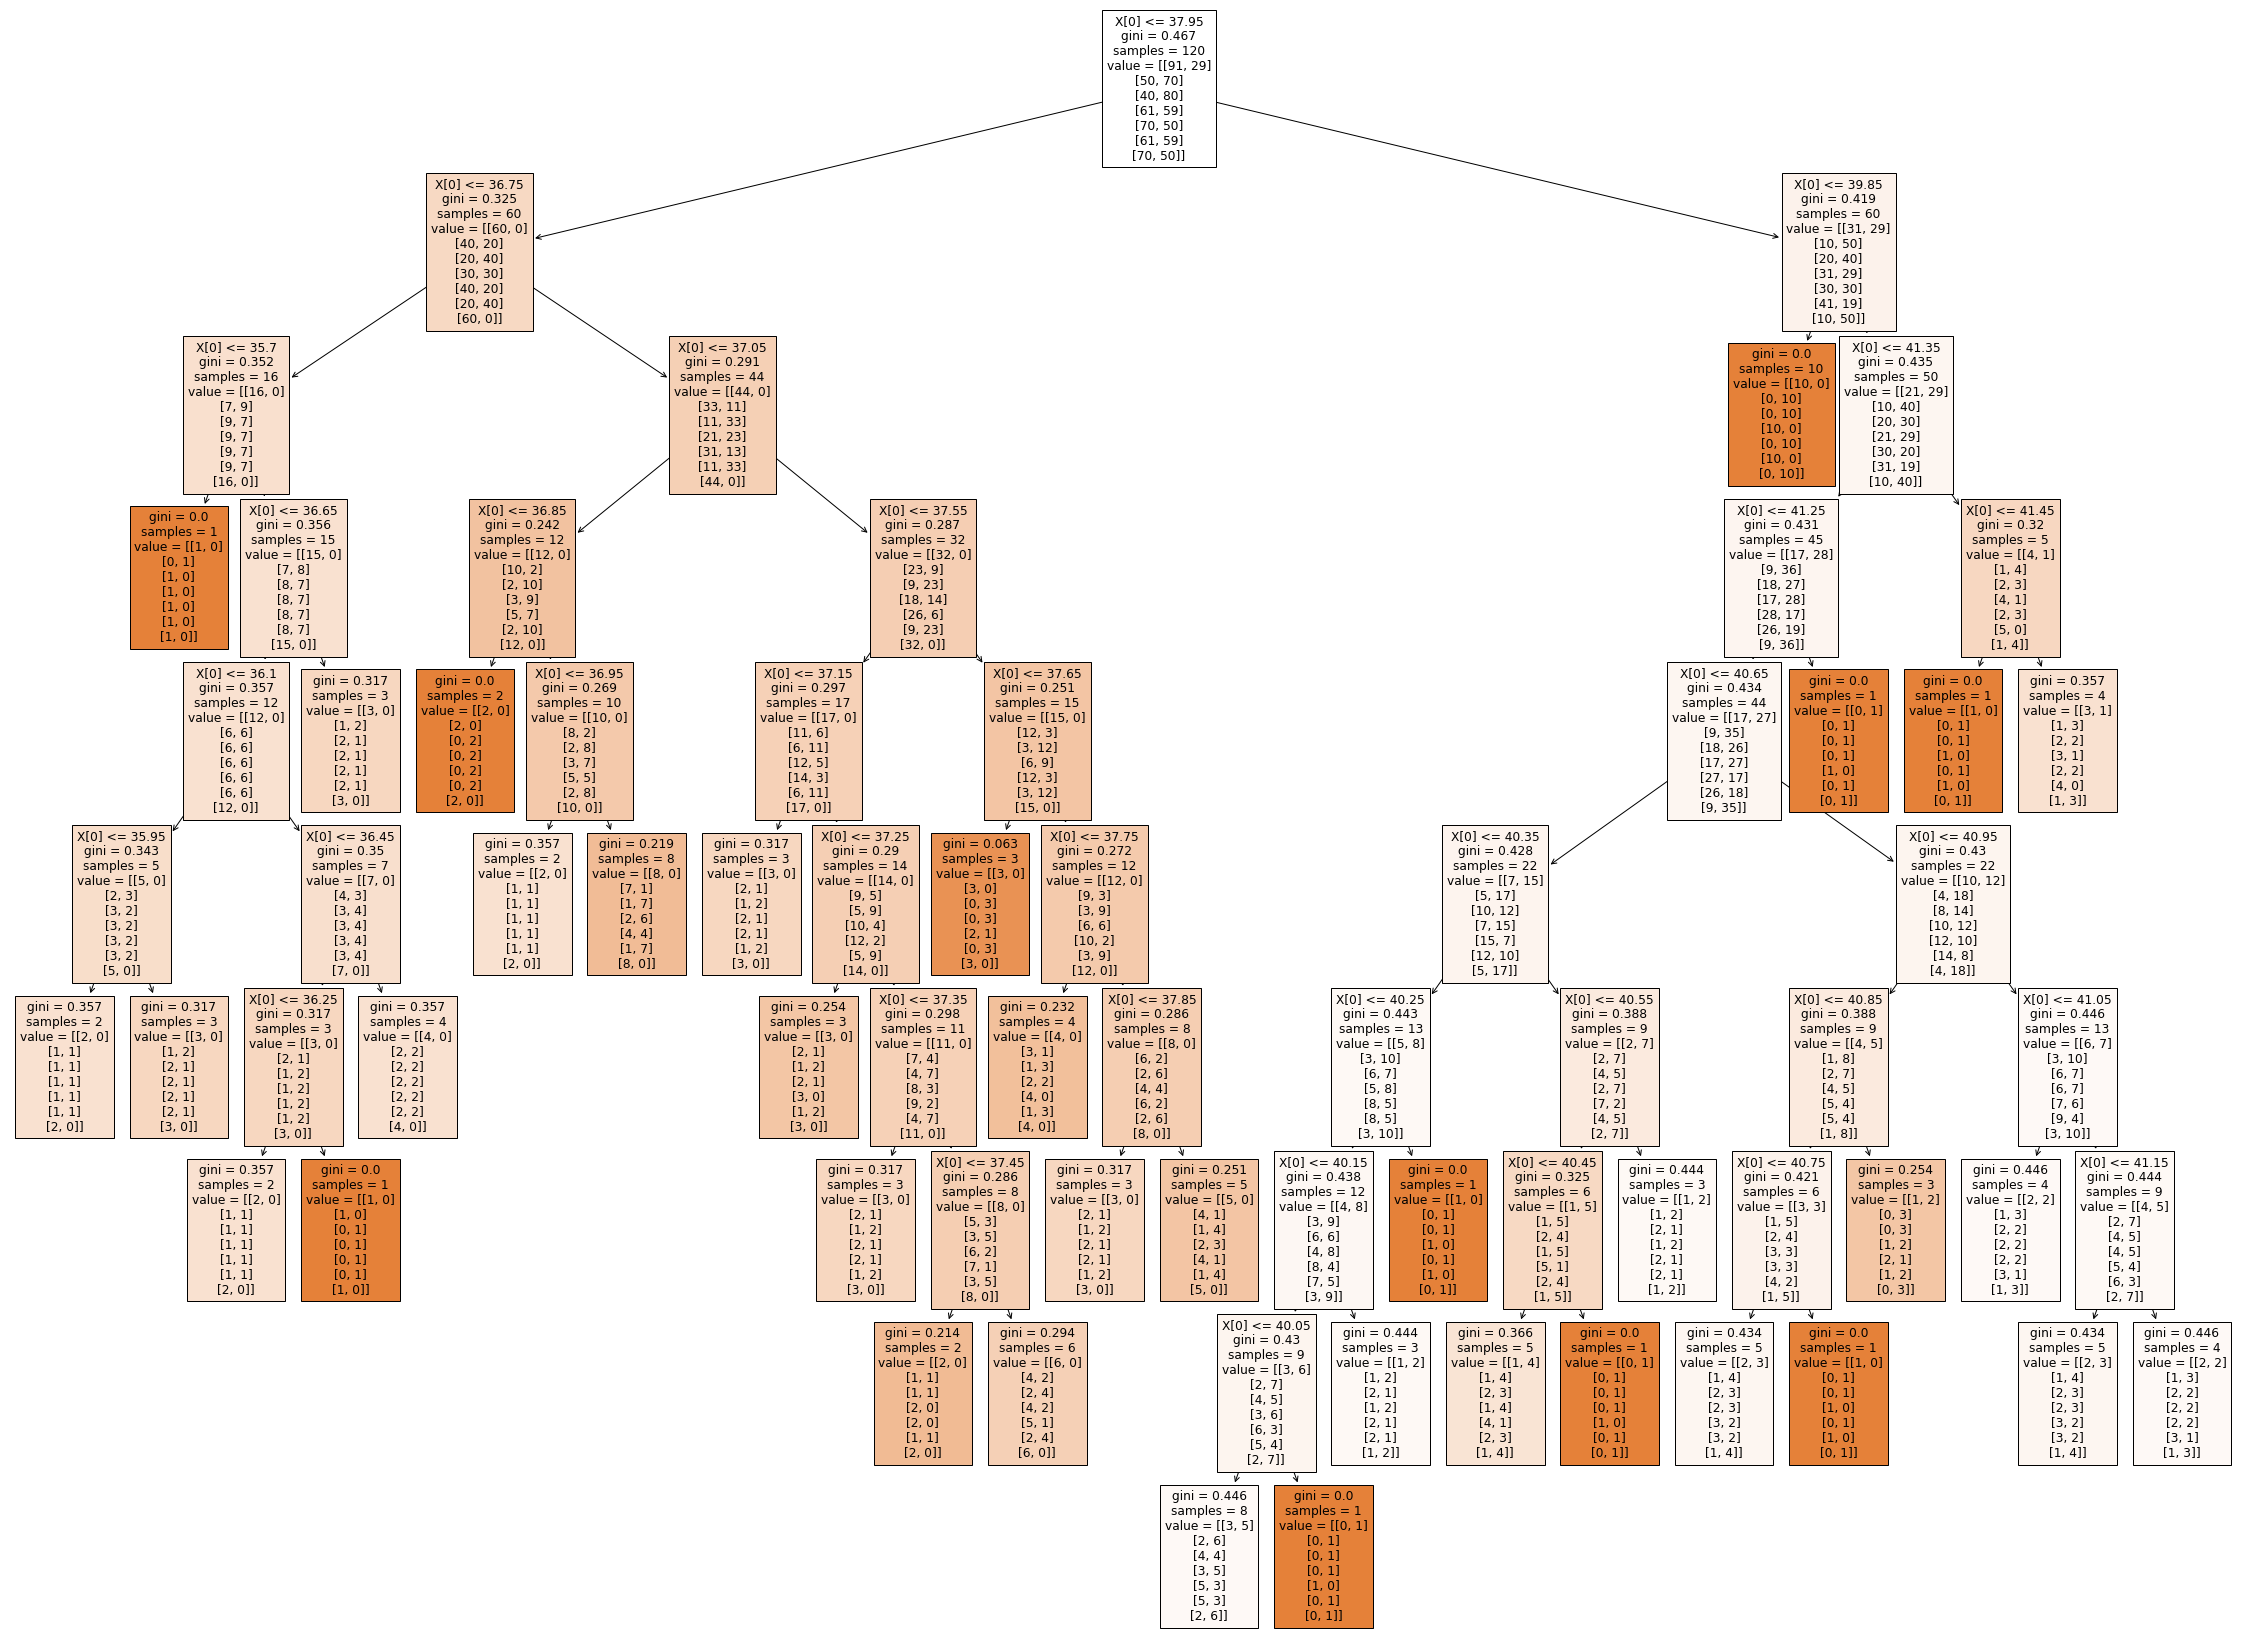

In [397]:
fig = plt.figure(figsize=(40,30))
tree.plot_tree(clf, filled = True)

## (c) Convert the decision rules into a set of IF-THEN rules

In [398]:
def tree_to_code(tree, feature_names):
	"""
	Outputs a decision tree model as a Python function
	
	Parameters:
	-----------
	tree: decision tree model
		The decision tree to represent as a function
	feature_names: list
		The feature names of the dataset used for building the decision tree
	"""

	tree_ = tree.tree_
	feature_name = [
		feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
		for i in tree_.feature
	]
	print("def tree({}):".format(", ".join(feature_names)))

	def recurse(node, depth):
		indent = "  " * depth
		if tree_.feature[node] != _tree.TREE_UNDEFINED:
			name = feature_name[node]
			threshold = tree_.threshold[node]
			print("{}if {} <= {}:".format(indent, name, threshold))
			recurse(tree_.children_left[node], depth + 1)
			print("{}else:  # if {} > {}".format(indent, name, threshold))
			recurse(tree_.children_right[node], depth + 1)
		else:
			print("{}return {}".format(indent, tree_.value[node]))

	recurse(0, 1)

In [399]:
tree_to_code(clf, 'X')

def tree(X):
  if X <= 37.95000076293945:
    if X <= 36.75:
      if X <= 35.70000076293945:
        return [[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
      else:  # if X > 35.70000076293945
        if X <= 36.64999961853027:
          if X <= 36.10000038146973:
            if X <= 35.95000076293945:
              return [[2. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [2. 0.]]
            else:  # if X > 35.95000076293945
              return [[3. 0.]
 [1. 2.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [3. 0.]]
          else:  # if X > 36.10000038146973
            if X <= 36.44999885559082:
              if X <= 36.25:
                return [[2. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [2. 0.]]
              else:  # if X > 36.25
                return [[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
            else:  # if X > 36.44999885559082
              return [[4. 0.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [4. 0.]]
       

Here with the code, we generated if-then rules.

## (d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.

In [400]:
cps = np.linspace(0.0001, 1, 1000)

In [401]:
x,y

(0      35,5
 1      35,9
 2      35,9
 3      36,0
 4      36,0
        ... 
 115    41,4
 116    41,5
 117    41,5
 118    41,5
 119    41,5
 Name: Temperature, Length: 120, dtype: object,
     Nausea Lumbar Urine Micturition Urethra Bladder Pelvis
 0       no    yes    no          no      no      no     no
 1       no     no   yes         yes     yes     yes     no
 2       no    yes    no          no      no      no     no
 3       no     no   yes         yes     yes     yes     no
 4       no    yes    no          no      no      no     no
 ..     ...    ...   ...         ...     ...     ...    ...
 115     no    yes   yes          no     yes      no    yes
 116     no     no    no          no      no      no     no
 117    yes    yes    no         yes      no      no    yes
 118     no    yes   yes          no     yes      no    yes
 119     no    yes   yes          no     yes      no    yes
 
 [120 rows x 7 columns])

In [402]:
y_new = y.replace('no','0').replace('yes','1')
y_new['y'] = y_new['Nausea']
y_new['y']

0      0
1      0
2      0
3      0
4      0
      ..
115    0
116    0
117    1
118    0
119    0
Name: y, Length: 120, dtype: object

In [403]:
for i in y_new.columns[1:-1]:
    y_new['y'] = y_new['y']+y_new[i]

In [404]:
y_list = []
for i in y_new['y']:
    y_list.append([int(j) for j in i])

In [405]:
y = y_list

In [406]:
x = np.array(x_new).reshape(-1,1)

In [407]:
params = {'ccp_alpha': cps}
clf = GridSearchCV(dt, params)

In [408]:
clf = clf.fit(x,y)

In [409]:
my_alpha = clf.best_estimator_.get_params()['ccp_alpha']
my_alpha

0.0001

[Text(0.5160256410256411, 0.95, 'X[0] <= 37.95\ngini = 0.467\nsamples = 120\nvalue = [[91, 29]\n[50, 70]\n[40, 80]\n[61, 59]\n[70, 50]\n[61, 59]\n[70, 50]]'),
 Text(0.21153846153846154, 0.85, 'X[0] <= 36.75\ngini = 0.325\nsamples = 60\nvalue = [[60, 0]\n[40, 20]\n[20, 40]\n[30, 30]\n[40, 20]\n[20, 40]\n[60, 0]]'),
 Text(0.10256410256410256, 0.75, 'X[0] <= 35.7\ngini = 0.352\nsamples = 16\nvalue = [[16, 0]\n[7, 9]\n[9, 7]\n[9, 7]\n[9, 7]\n[9, 7]\n[16, 0]]'),
 Text(0.07692307692307693, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]\n[1, 0]\n[1, 0]\n[1, 0]\n[1, 0]\n[1, 0]]'),
 Text(0.1282051282051282, 0.65, 'X[0] <= 36.65\ngini = 0.356\nsamples = 15\nvalue = [[15, 0]\n[7, 8]\n[8, 7]\n[8, 7]\n[8, 7]\n[8, 7]\n[15, 0]]'),
 Text(0.10256410256410256, 0.55, 'X[0] <= 36.1\ngini = 0.357\nsamples = 12\nvalue = [[12, 0]\n[6, 6]\n[6, 6]\n[6, 6]\n[6, 6]\n[6, 6]\n[12, 0]]'),
 Text(0.05128205128205128, 0.45, 'X[0] <= 35.95\ngini = 0.343\nsamples = 5\nvalue = [[5, 0]\n[2, 3]\n[3, 2]\n[3, 2]\n[3

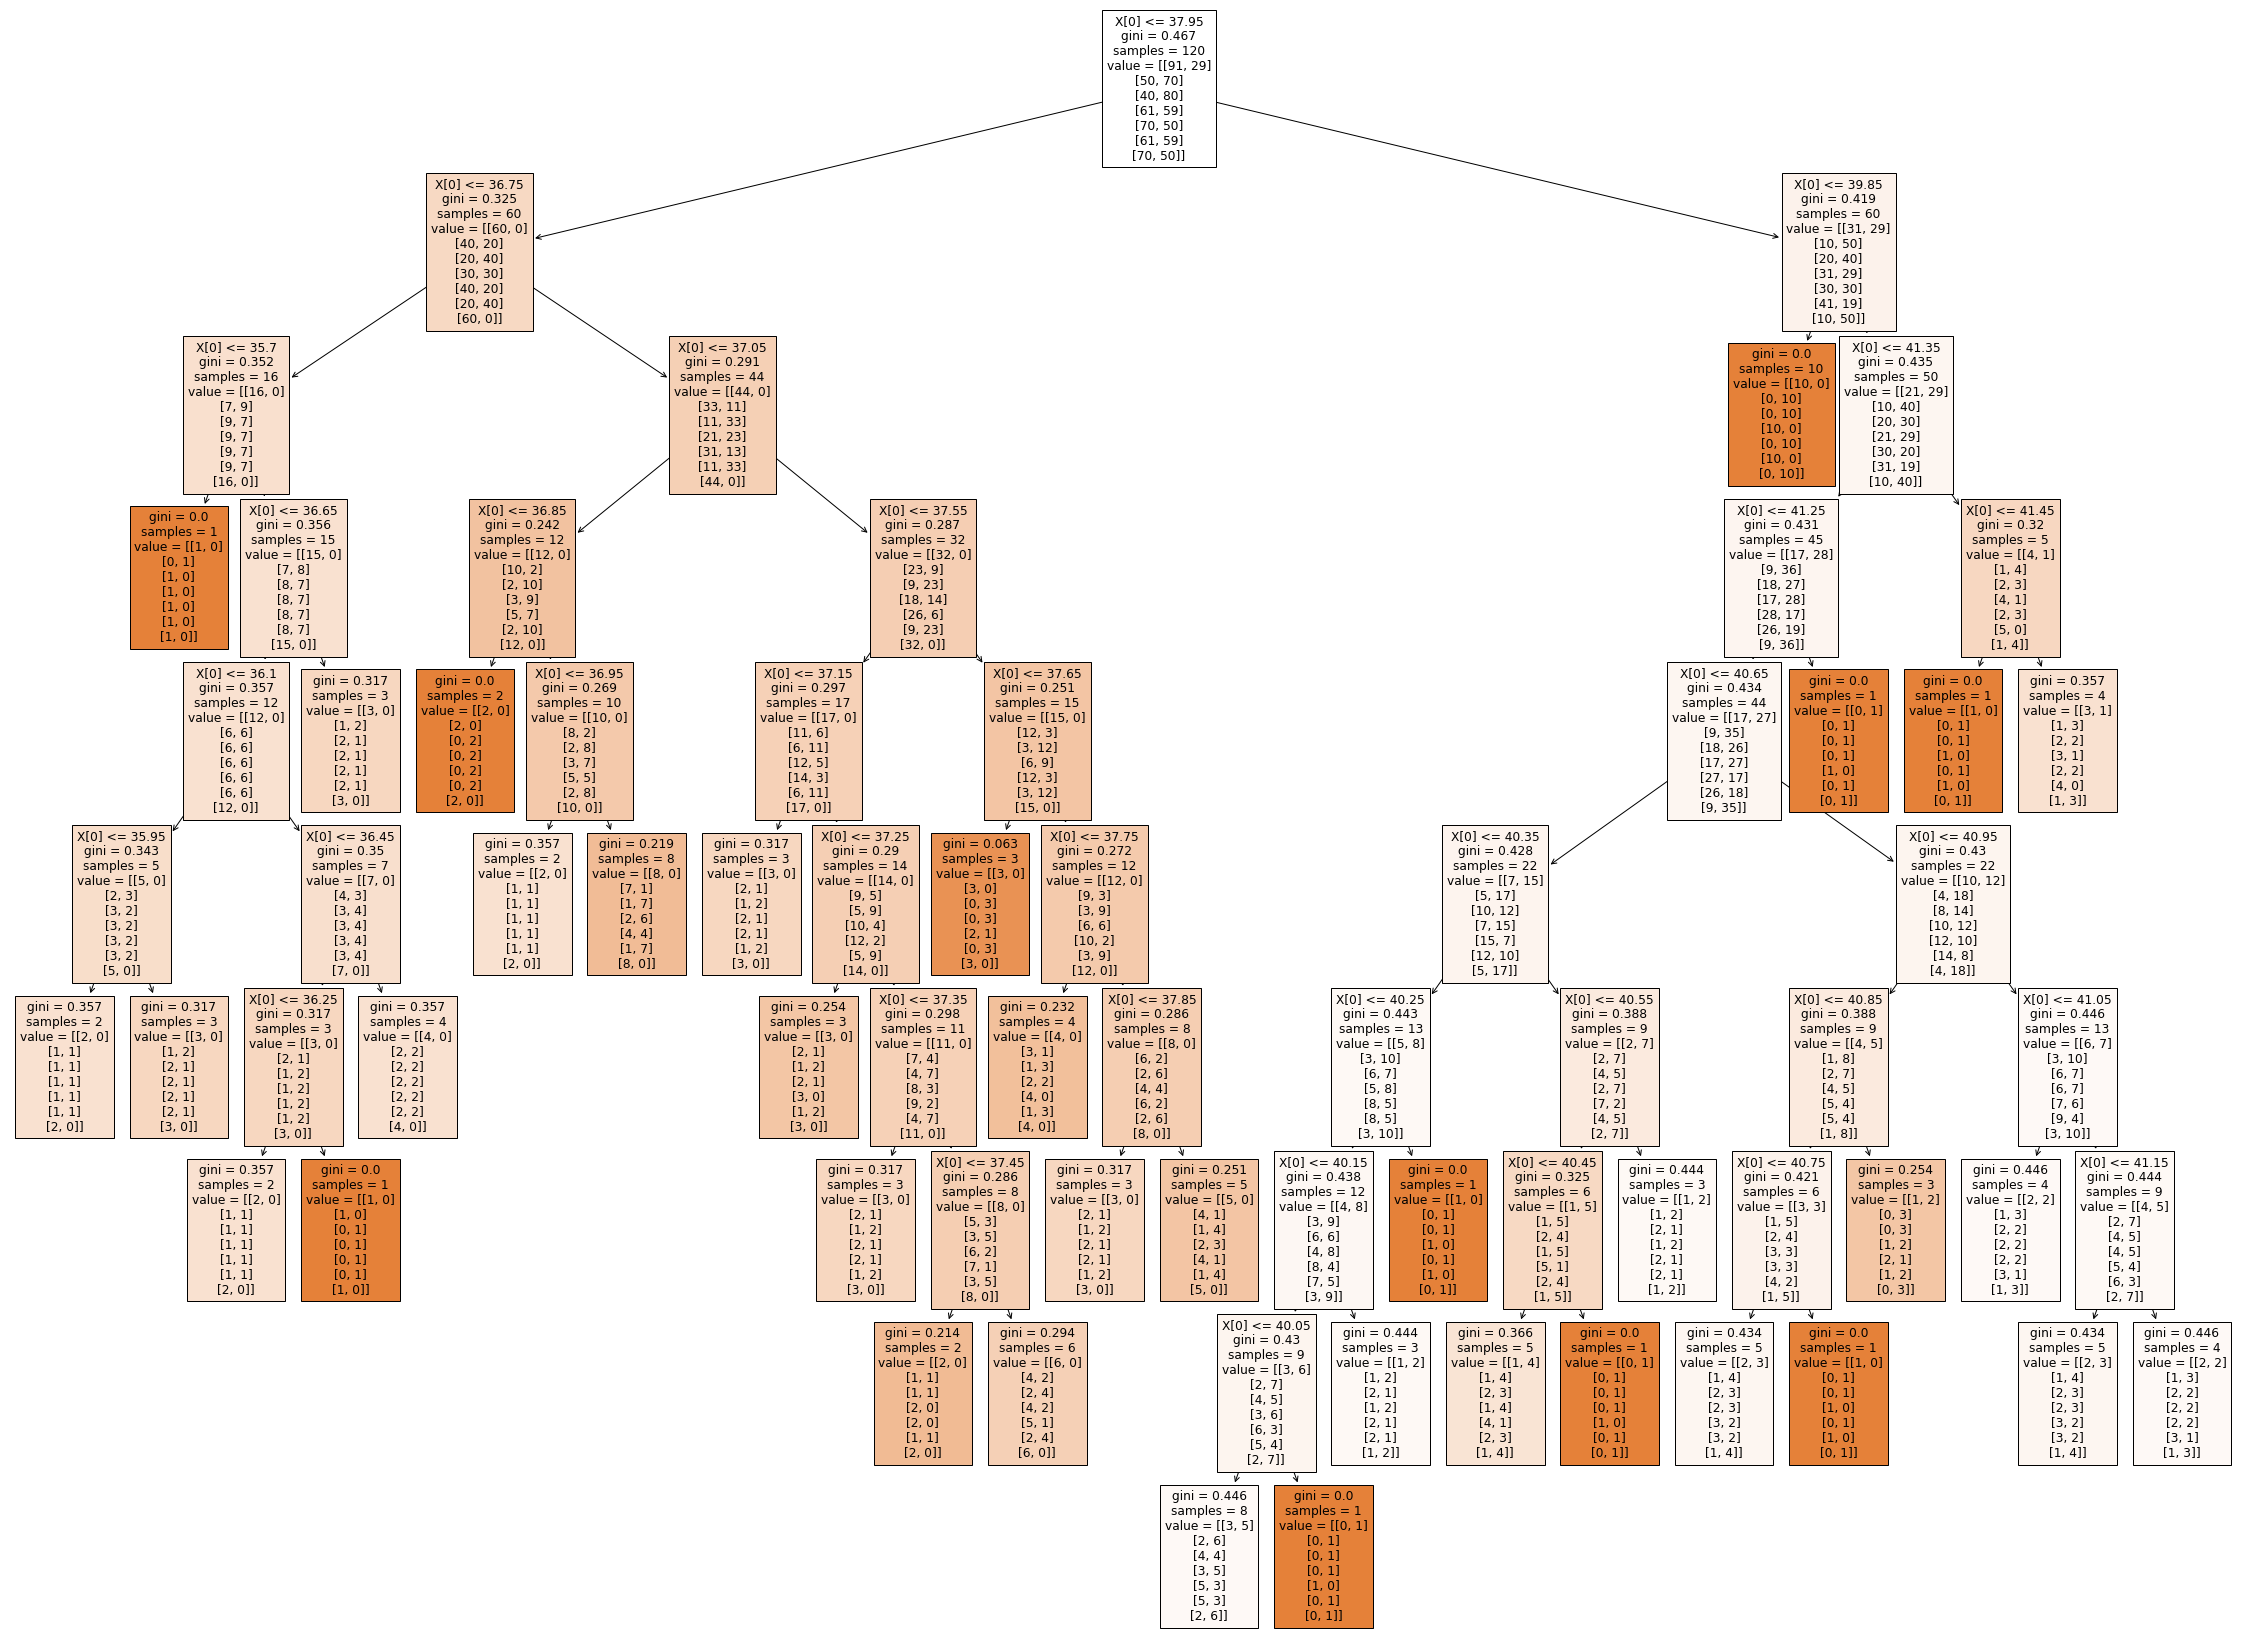

In [410]:
my_dt = DecisionTreeClassifier(ccp_alpha = my_alpha).fit(x,y)
fig = plt.figure(figsize=(40,30))
tree.plot_tree(my_dt, filled = True)

In [411]:
tree_to_code(my_dt, 'X')

def tree(X):
  if X <= 37.95000076293945:
    if X <= 36.75:
      if X <= 35.70000076293945:
        return [[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
      else:  # if X > 35.70000076293945
        if X <= 36.64999961853027:
          if X <= 36.10000038146973:
            if X <= 35.95000076293945:
              return [[2. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [2. 0.]]
            else:  # if X > 35.95000076293945
              return [[3. 0.]
 [1. 2.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [3. 0.]]
          else:  # if X > 36.10000038146973
            if X <= 36.44999885559082:
              if X <= 36.25:
                return [[2. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [2. 0.]]
              else:  # if X > 36.25
                return [[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
            else:  # if X > 36.44999885559082
              return [[4. 0.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [4. 0.]]
       

# 2. The LASSO and Boosting for Regression

## (a) Download the Communities and Crime data. Use the first 1495 rows of data as the training set and the rest as the test set.

In [412]:
my_df = pd.read_csv('../data/communities.csv')
my_df.head()

8   ?    ?.1         Lakewoodcity  1  0.19  0.33  0.02   0.9  0.12  ...  \
0  53   ?      ?          Tukwilacity  1  0.00  0.16  0.12  0.74  0.45  ...   
1  24   ?      ?         Aberdeentown  1  0.00  0.42  0.49  0.56  0.17  ...   
2  34   5  81440  Willingborotownship  1  0.04  0.77  1.00  0.08  0.12  ...   
3  42  95   6096    Bethlehemtownship  1  0.01  0.55  0.02  0.95  0.09  ...   
4   6   ?      ?    SouthPasadenacity  1  0.02  0.28  0.06  0.54  1.00  ...   

   0.12.2  0.26.1  0.2.1  0.06.3  0.04.2  0.9.1  0.5.2  0.32.2  0.14.3  0.2.2  
0    0.02    0.12   0.45       ?       ?      ?      ?     0.0       ?   0.67  
1    0.01    0.21   0.02       ?       ?      ?      ?     0.0       ?   0.43  
2    0.02    0.39   0.28       ?       ?      ?      ?     0.0       ?   0.12  
3    0.04    0.09   0.02       ?       ?      ?      ?     0.0       ?   0.03  
4    0.01    0.58   0.10       ?       ?      ?      ?     0.0       ?   0.14  

[5 rows x 128 columns]

In [413]:
data = open('../data/communities_names.csv')
attributes = []
for line in data:
    if line[0:10] == "@attribute":
        attributes.append(line.split(' ')[1])

In [414]:
my_df = pd.read_csv('../data/communities.csv', names = attributes )
my_df.head()

state county community        communityname  fold  population  \
0      8      ?         ?         Lakewoodcity     1        0.19   
1     53      ?         ?          Tukwilacity     1        0.00   
2     24      ?         ?         Aberdeentown     1        0.00   
3     34      5     81440  Willingborotownship     1        0.04   
4     42     95      6096    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0           0.33          0.02          0.90          0.12  ...      0.12   
1           0.16          0.12          0.74          0.45  ...      0.02   
2           0.42          0.49          0.56          0.17  ...      0.01   
3           0.77          1.00          0.08          0.12  ...      0.02   
4           0.55          0.02          0.95          0.09  ...      0.04   

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0     0.26            0.20       0.06           0.04                  0.9   
1     0.12            0.45          ?              ?                    ?   
2     0.21            0.02          ?              ?                    ?   
3     0.39            0.28          ?              ?                    ?   
4     0.09            0.02          ?              ?                    ?   

   LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                  0.5                 0.32             0.14   
1                    ?                 0.00                ?   
2                    ?                 0.00                ?   
3                    ?                 0.00                ?   
4                    ?                 0.00                ?   

   ViolentCrimesPerPop  
0                 0.20  
1                 0.67  
2                 0.43  
3                 0.12  
4                 0.03  

[5 rows x 128 columns]

In [415]:
x, y = my_df.drop(columns = ['ViolentCrimesPerPop']), my_df['ViolentCrimesPerPop']

In [416]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 1495, shuffle = False)

In [417]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1495, 127), (1495,), (499, 127), (499,))

As above, train and test sets are created.

## (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features

In [418]:
x_train = x_train.iloc[:,5:]
x_test = x_test.iloc[:,5:]

In [419]:
x_train

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1490        0.00           0.59          0.01          0.69          1.00   
1491        0.16           0.62          0.03          0.74          0.48   
1492        0.01           0.36          0.95          0.24          0.03   
1493        0.06           0.53          0.01          0.98          0.05   
1494        0.05           0.43          0.08          0.65          0.12   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1490         0.07         0.41         0.28         0.23        0.57  ...   
1491         0.42         0.44         0.57         0.40        0.25  ...   
1492         0.01         0.44         0.42         0.27        0.63  ...   
1493         0.01         0.40         0.40         0.24        0.29  ...   
1494         1.00         0.37         0.52         0.33        0.44  ...   

      PolicAveOTWorked  LandArea  PopDens  PctUsePubTrans  PolicCars  \
0                 0.29      0.12     0.26            0.20       0.06   
1                    ?      0.02     0.12            0.45          ?   
2                    ?      0.01     0.21            0.02          ?   
3                    ?      0.02     0.39            0.28          ?   
4                    ?      0.04     0.09            0.02          ?   
...                ...       ...      ...             ...        ...   
1490                 ?      0.02     0.14            0.22          ?   
1491              0.38      0.07     0.40            0.14       0.07   
1492                 ?      0.03     0.12            0.01          ?   
1493                 ?      0.08     0.15            0.02          ?   
1494              0.48      0.00     1.00            1.00          0   

      PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0              0.04                  0.9                  0.5   
1                 ?                    ?                    ?   
2                 ?                    ?                    ?   
3                 ?                    ?                    ?   
4                 ?                    ?                    ?   
...             ...                  ...                  ...   
1490              ?                    ?                    ?   
1491           0.05                 0.85                  0.5   
1492              ?                    ?                    ?   
1493              ?                    ?                    ?   
1494           0.01                 0.77                    0   

      LemasPctOfficDrugUn  PolicBudgPerPop  
0                    0.32             0.14  
1                    0.00                ?  
2                    0.00                ?  
3                    0.00                ?  
4                    0.00                ?  
...                   ...              ...  
1490                 0.00                ?  
1491                 0.61             0.19  
1492                 0.00                ?  
1493                 0.00                ?  
1494           

In [420]:
x_test

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
1495        0.00           0.20          0.03          0.91          0.23   
1496        0.00           0.55          0.13          0.78          0.15   
1497        0.00           0.52          0.04          0.59          0.05   
1498        0.04           0.51          0.07          0.92          0.09   
1499        0.03           0.59          0.20          0.75          0.19   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
1495         0.05         0.15         0.19         0.09        0.42  ...   
1496         0.36         0.48         0.53         0.30        0.10  ...   
1497         0.62         0.84         0.78         0.75        0.43  ...   
1498         0.03         0.38         0.47         0.27        0.35  ...   
1499         0.10         0.38         0.62         0.35        0.11  ...   
...           ...          ...          ...          ...         ...  ...   
1989         0.16         0.43         0.51         0.35        0.30  ...   
1990         0.32         0.69         0.86         0.73        0.14  ...   
1991         0.25         0.35         0.50         0.31        0.54  ...   
1992         0.10         0.58         0.74         0.63        0.41  ...   
1993         0.77         0.50         0.62         0.40        0.17  ...   

      PolicAveOTWorked  LandArea  PopDens  PctUsePubTrans  PolicCars  \
1495                 ?      0.01     0.23            0.73          ?   
1496                 ?      0.01     0.18            0.02          ?   
1497                 ?      0.01     0.18            0.00          ?   
1498                 ?      0.06     0.13            0.16          ?   
1499                 ?      0.03     0.23            0.06          ?   
...                ...       ...      ...             ...        ...   
1989                 ?      0.01     0.28            0.05          ?   
1990                 ?      0.02     0.37            0.20          ?   
1991              0.25      0.08     0.32            0.18       0.08   
1992              0.19      0.03     0.38            0.33       0.02   
1993              0.11      0.11     0.30            0.05       0.08   

      PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
1495              ?                    ?                    ?   
1496              ?                    ?                    ?   
1497              ?                    ?                    ?   
1498              ?                    ?                    ?   
1499              ?                    ?                    ?   
...             ...                  ...                  ...   
1989              ?                    ?                    ?   
1990              ?                    ?                    ?   
1991           0.06                 0.78                    0   
1992           0.02                 0.79                    0   
1993           0.04                 0.73                  0.5   

      LemasPctOfficDrugUn  PolicBudgPerPop  
1495                 0.00                ?  
1496                 0.00                ?  
1497                 0.00                ?  
1498                 0.00                ?  
1499                 0.00                ?  
...                   ...              ...  
1989                 0.00                ?  
1990                 0.00                ?  
1991                 0.91             0.28  
1992                 0.22             0.18  
1993           

In [421]:
x_train = x_train.replace('?', np.nan)
x_test = x_test.replace('?', np.nan)
x = x.iloc[:,5:]
x = x.replace('?', np.nan)

In [422]:
Iter = IterativeImputer(random_state = 0)

In [423]:
Iter = Iter.fit(x)

In [424]:
x_train = Iter.transform(x_train)
x_test = Iter.transform(x_test)

In [425]:
x_train = pd.DataFrame(x_train)
x_train

0     1     2     3     4     5     6     7     8     9    ...  \
0     0.19  0.33  0.02  0.90  0.12  0.17  0.34  0.47  0.29  0.32  ...   
1     0.00  0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  ...   
2     0.00  0.42  0.49  0.56  0.17  0.04  0.39  0.47  0.28  0.32  ...   
3     0.04  0.77  1.00  0.08  0.12  0.10  0.51  0.50  0.34  0.21  ...   
4     0.01  0.55  0.02  0.95  0.09  0.05  0.38  0.38  0.23  0.36  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
1490  0.00  0.59  0.01  0.69  1.00  0.07  0.41  0.28  0.23  0.57  ...   
1491  0.16  0.62  0.03  0.74  0.48  0.42  0.44  0.57  0.40  0.25  ...   
1492  0.01  0.36  0.95  0.24  0.03  0.01  0.44  0.42  0.27  0.63  ...   
1493  0.06  0.53  0.01  0.98  0.05  0.01  0.40  0.40  0.24  0.29  ...   
1494  0.05  0.43  0.08  0.65  0.12  1.00  0.37  0.52  0.33  0.44  ...   

           112   113   114   115       116       117       118       119  \
0     0.290000  0.12  0.26  0.20  0.060000  0.040000  0.900000  0.500000   
1     0.321703  0.02  0.12  0.45  0.041574  0.028157  0.866306  0.639758   
2     0.280888  0.01  0.21  0.02  0.050528 -0.008062  1.137582  0.499376   
3     0.235669  0.02  0.39  0.28  0.080584  0.033792  0.796642  0.461159   
4     0.230210  0.04  0.09  0.02  0.031025  0.017185  0.793476  0.307233   
...        ...   ...   ...   ...       ...       ...       ...       ...   
1490  0.377502  0.02  0.14  0.22 -0.048432 -0.025799  0.509042  0.359301   
1491  0.380000  0.07  0.40  0.14  0.070000  0.050000  0.850000  0.500000   
1492  0.283710  0.03  0.12  0.01  0.024542 -0.012718  0.665766  0.483156   
1493  0.256615  0.08  0.15  0.02  0.059702  0.069514  0.901289  0.363937   
1494  0.480000  0.00  1.00  1.00  0.000000  0.010000  0.770000  0.000000   

       120       121  
0     0.32  0.140000  
1     0.00  0.212728  
2     0.00  0.255733  
3     0.00  0.225014  
4     0.00  0.179882  
...    ...       ...  
1490  0.00  0.205833  
1491  0.61  0.190000  
1492  0.00  0.160181  
1493  0.00  0.218787  
1494  0.51  0.180000  

[1495 rows x 122 columns]

In [426]:
x_test = pd.DataFrame(x_test)
x_test

0     1     2     3     4     5     6     7     8     9    ...  \
0    0.00  0.20  0.03  0.91  0.23  0.05  0.15  0.19  0.09  0.42  ...   
1    0.00  0.55  0.13  0.78  0.15  0.36  0.48  0.53  0.30  0.10  ...   
2    0.00  0.52  0.04  0.59  0.05  0.62  0.84  0.78  0.75  0.43  ...   
3    0.04  0.51  0.07  0.92  0.09  0.03  0.38  0.47  0.27  0.35  ...   
4    0.03  0.59  0.20  0.75  0.19  0.10  0.38  0.62  0.35  0.11  ...   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
494  0.01  0.40  0.10  0.87  0.12  0.16  0.43  0.51  0.35  0.30  ...   
495  0.05  0.96  0.46  0.28  0.83  0.32  0.69  0.86  0.73  0.14  ...   
496  0.16  0.37  0.25  0.69  0.04  0.25  0.35  0.50  0.31  0.54  ...   
497  0.08  0.51  0.06  0.87  0.22  0.10  0.58  0.74  0.63  0.41  ...   
498  0.20  0.78  0.14  0.46  0.24  0.77  0.50  0.62  0.40  0.17  ...   

          112   113   114   115       116       117       118       119   120  \
0    0.340269  0.01  0.23  0.73  0.027978  0.036737  0.718951  0.484412  0.00   
1    0.213634  0.01  0.18  0.02  0.052416  0.097943  0.479776  0.420703  0.00   
2    0.321949  0.01  0.18  0.00  0.064154  0.018354  1.305398  0.522564  0.00   
3    0.259047  0.06  0.13  0.16  0.039334  0.039236  0.820179  0.364097  0.00   
4    0.215961  0.03  0.23  0.06  0.040837  0.029928  0.589787  0.505121  0.00   
..        ...   ...   ...   ...       ...       ...       ...       ...   ...   
494  0.250469  0.01  0.28  0.05  0.057594  0.025910  0.578187  0.505908  0.00   
495  0.351105  0.02  0.37  0.20  0.074346  0.047210  0.656974  0.584959  0.00   
496  0.250000  0.08  0.32  0.18  0.080000  0.060000  0.780000  0.000000  0.91   
497  0.190000  0.03  0.38  0.33  0.020000  0.020000  0.790000  0.000000  0.22   
498  0.110000  0.11  0.30  0.05  0.080000  0.040000  0.730000  0.500000  1.00   

          121  
0    0.304298  
1    0.172762  
2    0.211207  
3    0.203531  
4    0.229606  
..        ...  
494  0.183910  
495  0.227828  
496  0.280000  
497  0.180000  
498  0.130000  

[499 rows x 122 columns]

In [427]:
x = Iter.transform(x)
x = pd.DataFrame(x)
x

0     1     2     3     4     5     6     7     8     9    ...  \
0     0.19  0.33  0.02  0.90  0.12  0.17  0.34  0.47  0.29  0.32  ...   
1     0.00  0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  ...   
2     0.00  0.42  0.49  0.56  0.17  0.04  0.39  0.47  0.28  0.32  ...   
3     0.04  0.77  1.00  0.08  0.12  0.10  0.51  0.50  0.34  0.21  ...   
4     0.01  0.55  0.02  0.95  0.09  0.05  0.38  0.38  0.23  0.36  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
1989  0.01  0.40  0.10  0.87  0.12  0.16  0.43  0.51  0.35  0.30  ...   
1990  0.05  0.96  0.46  0.28  0.83  0.32  0.69  0.86  0.73  0.14  ...   
1991  0.16  0.37  0.25  0.69  0.04  0.25  0.35  0.50  0.31  0.54  ...   
1992  0.08  0.51  0.06  0.87  0.22  0.10  0.58  0.74  0.63  0.41  ...   
1993  0.20  0.78  0.14  0.46  0.24  0.77  0.50  0.62  0.40  0.17  ...   

           112   113   114   115       116       117       118       119  \
0     0.290000  0.12  0.26  0.20  0.060000  0.040000  0.900000  0.500000   
1     0.321703  0.02  0.12  0.45  0.041574  0.028157  0.866306  0.639758   
2     0.280888  0.01  0.21  0.02  0.050528 -0.008062  1.137582  0.499376   
3     0.235669  0.02  0.39  0.28  0.080584  0.033792  0.796642  0.461159   
4     0.230210  0.04  0.09  0.02  0.031025  0.017185  0.793476  0.307233   
...        ...   ...   ...   ...       ...       ...       ...       ...   
1989  0.250469  0.01  0.28  0.05  0.057594  0.025910  0.578187  0.505908   
1990  0.351105  0.02  0.37  0.20  0.074346  0.047210  0.656974  0.584959   
1991  0.250000  0.08  0.32  0.18  0.080000  0.060000  0.780000  0.000000   
1992  0.190000  0.03  0.38  0.33  0.020000  0.020000  0.790000  0.000000   
1993  0.110000  0.11  0.30  0.05  0.080000  0.040000  0.730000  0.500000   

       120       121  
0     0.32  0.140000  
1     0.00  0.212728  
2     0.00  0.255733  
3     0.00  0.225014  
4     0.00  0.179882  
...    ...       ...  
1989  0.00  0.183910  
1990  0.00  0.227828  
1991  0.91  0.280000  
1992  0.22  0.180000  
1993  1.00  0.130000  

[1994 rows x 122 columns]

As above, I used iterative imputation based on Round Robin to impute the data. Ignored the 5 columns as well. I did that seperately for training set, test set, and the whole data set for your information.

## (c) Plot a correlation matrix for the features in the data set.

In [428]:
corr_train = x_train.corr()

In [429]:
corr_train .style.background_gradient(cmap='coolwarm')

In [430]:
corr_test = x_test.corr()

In [431]:
corr_test.style.background_gradient(cmap='coolwarm')

In [432]:
corr_x = x.corr()

In [433]:
corr_x.style.background_gradient(cmap='coolwarm')

As above, correlation matrices for train and test features are plotted. I did that seperately for training set, test set, and the whole data set for your information.

## (d) Calculate the Coefficient of Variation CV for each feature, where CV =s/m, in which s is sample standard deviation and m is sample mean

In [434]:
feature_CV = []
names = x.columns

In [435]:
for i in x.columns:
    mean = np.mean(x[i])
    std = np.std(x[i])
    feature_CV.append(std/mean)

In [436]:
CV_frame = pd.DataFrame({'feature': names, 'CV': feature_CV})
CV_frame

feature        CV
0          0  2.202950
1          1  0.353210
2          2  1.410567
3          3  0.323700
4          4  1.358821
..       ...       ...
117      117  2.004406
118      118  0.264729
119      119  0.448645
120      120  2.554625
121      121  0.401623

[122 rows x 2 columns]

As above, I got the CV for each features in the whole dataset.

## (e) Pick √128 features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

In [437]:
number = math.floor(math.sqrt(128))
number

11

In [438]:
sortCV = sorted(feature_CV, reverse = True)
Sort = sortCV[0:11]
Sort

[5.229936173073784,
 4.406597060924119,
 3.484607166824025,
 2.993445553811178,
 2.8999781495388515,
 2.899769766465966,
 2.554625183856767,
 2.304391666011784,
 2.2657900665109842,
 2.2029499338653187,
 2.004406310179328]

In [439]:
sliced_frame = pd.DataFrame()
for i in range(11):
    sliced_frame = pd.concat([sliced_frame, CV_frame.loc[CV_frame['CV'] == Sort[i]]])
sliced_frame

feature        CV
100      100  5.229936
90        90  4.406597
89        89  3.484607
49        49  2.993446
96        96  2.899978
51        51  2.899770
120      120  2.554625
27        27  2.304392
108      108  2.265790
0          0  2.202950
117      117  2.004406

In [440]:
features = sliced_frame.feature.values
features

array([100,  90,  89,  49,  96,  51, 120,  27, 108,   0, 117])

In [441]:
x.shape

(1994, 122)

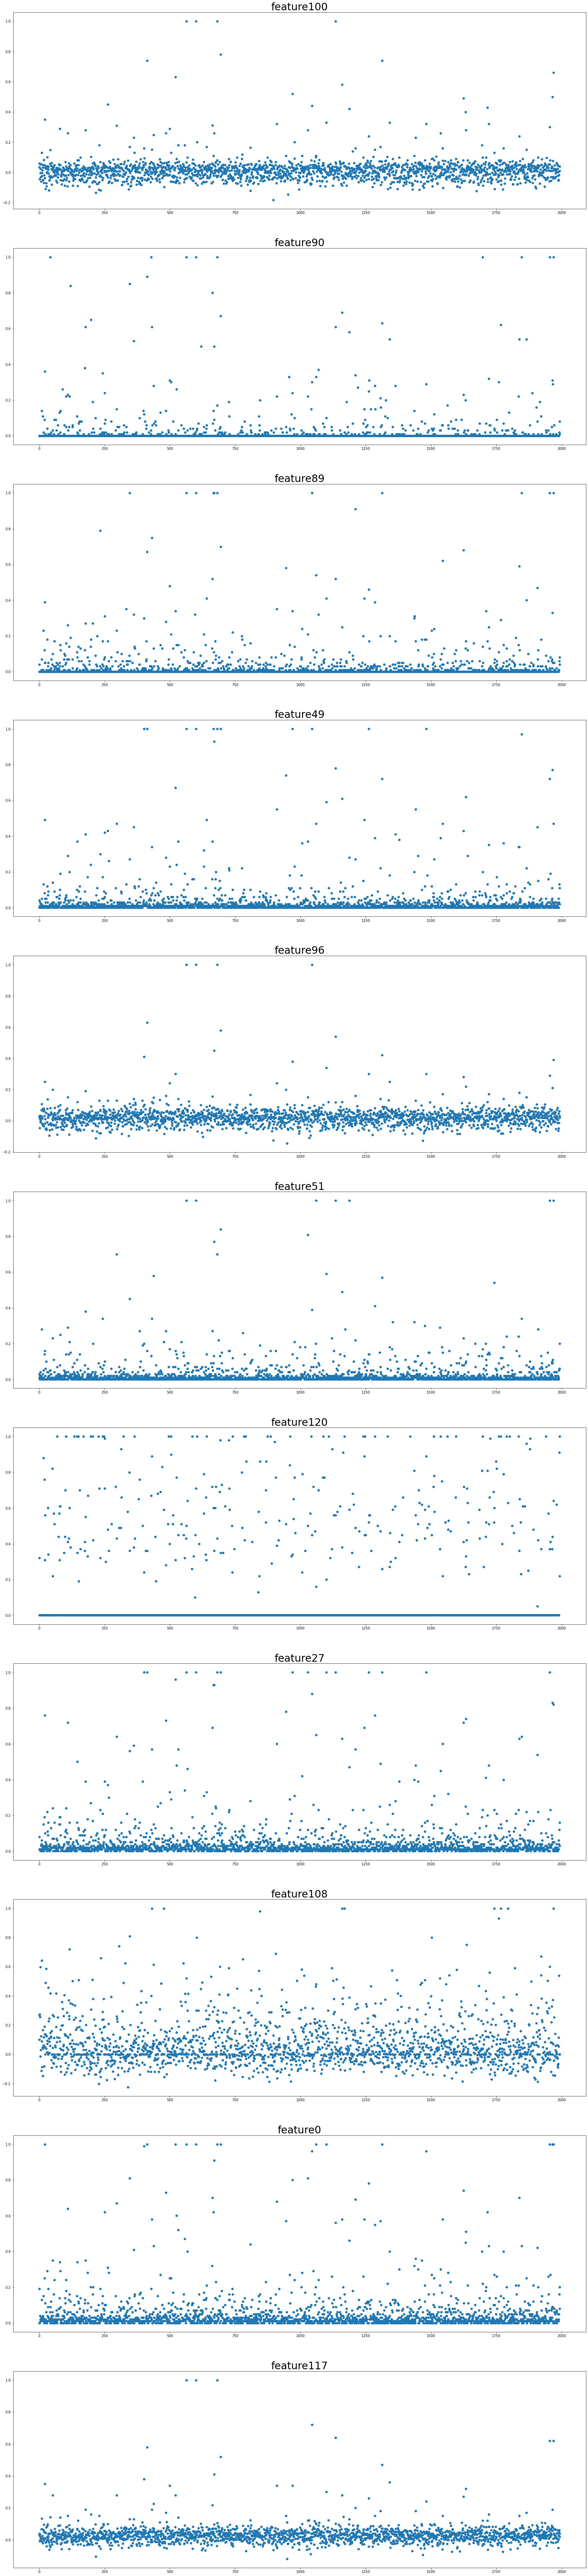

In [442]:
plt.figure(figsize = (30,150))
num = 1
for i in features:
    plt.subplot(12,1,num)
    plt.scatter(np.arange(1994), x[i])
    plt.title('feature' + str(i), fontsize = 30)
    num += 1

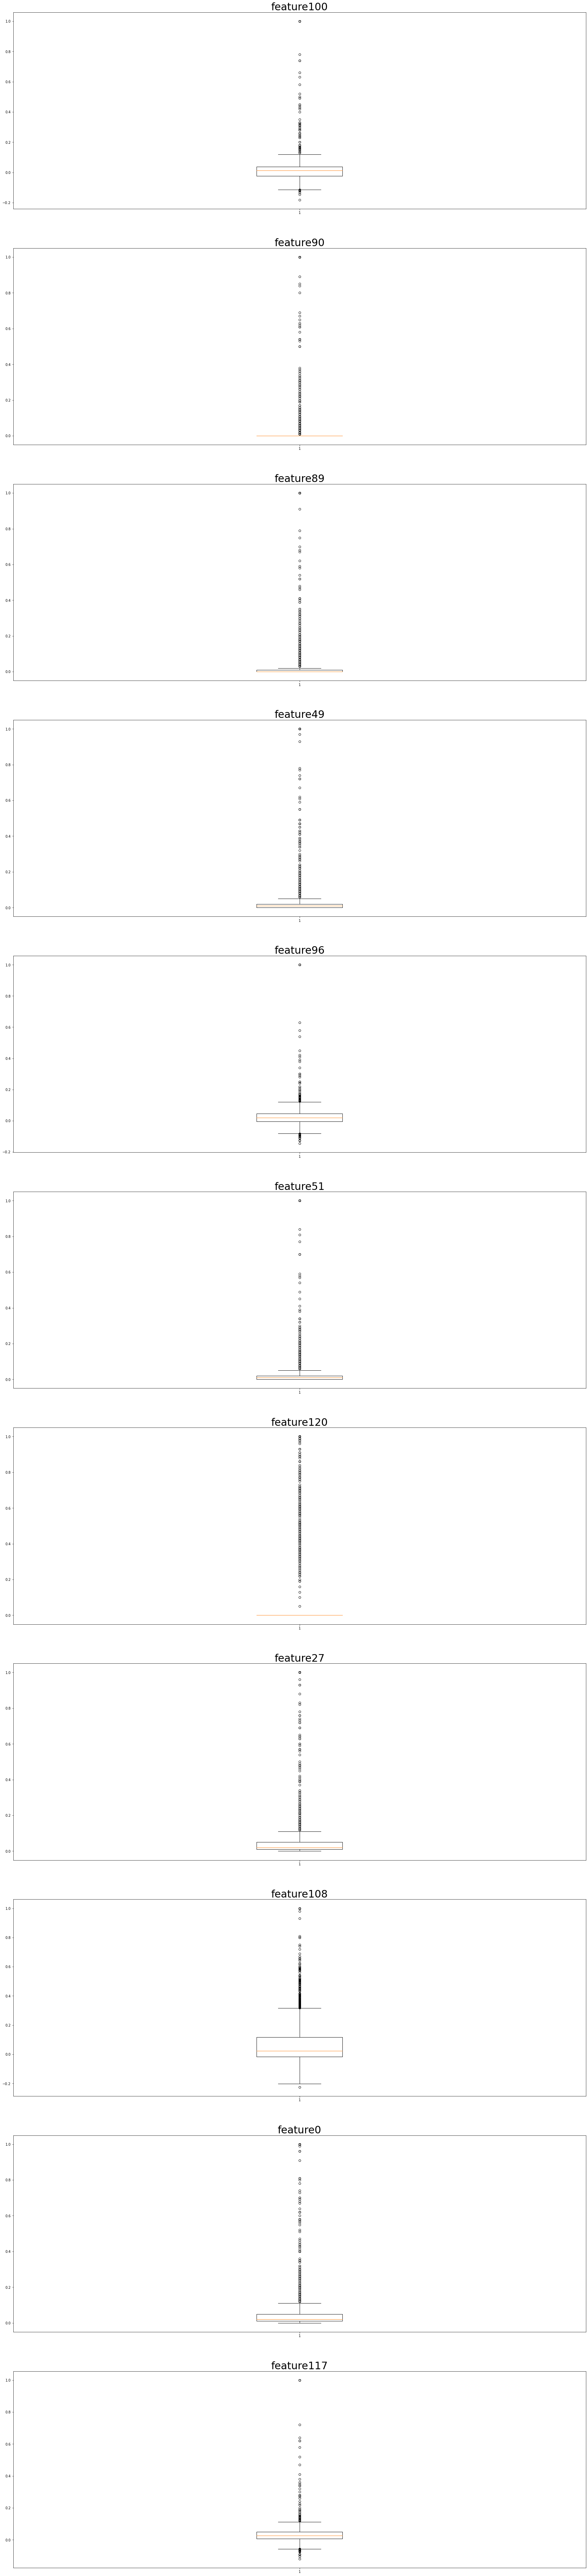

In [443]:
plt.figure(figsize = (30,150))
num = 1
for i in features:
    plt.subplot(12,1,num)
    plt.boxplot(x[i])
    plt.title('feature' + str(i), fontsize = 30)
    num += 1

From the box plots and scatter plots, we do see that those variables are mostly distributed around 0, which means that they make no difference to the response variable, which means insignificance. However, without statistical test and model cross validation, we cannot say that directly. We can only say they seems to be insignificant according to the scatter and box plots.

## (f) Fit a linear model using least squares to the training set and report the test error.

In [444]:
clf = sm.OLS(y_train, x_train).fit()

In [445]:
y_predict = clf.predict(x_test)

In [446]:
MSE = mean_squared_error(y_test, y_predict)
MSE

0.01805781810428153

I used linear regression here and get test mean squared error 0.01805781810428153.

## (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained

In [447]:
alpha = np.linspace(0.0001, 10, num = 1000)

In [448]:
ridge = RidgeCV(alphas = alpha).fit(x_train, y_train)
ridge.best_score_

-0.019001522697295107

In [449]:
ridge.alpha_

2.2122900900900904

In [450]:
y_pred = ridge.predict(x_test)
MSE_ridge = mean_squared_error(y_test, y_pred)
MSE

0.01805781810428153

As above, The λ choosed here is 2.21, and the test error os 0.018.

## (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them

### Without standardize

In [451]:
lasso = LassoCV(n_alphas = 1000).fit(x_train, y_train)
lasso.alpha_

0.00012415005295345646

In [452]:
y_pred = lasso.predict(x_test)
MSE_lasso_original = mean_squared_error(y_test, y_pred)
MSE_lasso_original

0.017834776048111553

### With standardize

In [453]:
stand = StandardScaler()

In [454]:
x_train_standard = stand.fit_transform(x_train)
x_test_standard = stand.fit_transform(x_test)

In [455]:
lasso = LassoCV(n_alphas = 1000).fit(x_train_standard, y_train)
lasso.alpha_

0.0006335252345230189

In [456]:
y_pred = lasso.predict(x_test_standard)
MSE_lasso_standard = mean_squared_error(y_test, y_pred)
MSE_lasso_standard

0.01815177894192672

Here, we can see that MSE for non-standardized Lasso is 0.0178, smaller than standardized Lasso, which is 0.0182. So, in this case, Lasso without standardization performed better.

## (i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained

In [457]:
component = np.arange(122)+1
component

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122])

In [458]:
linear = LinearRegression()
CV_score = []
for i in component:
    pca = PCA(n_components = i, random_state = 0)
    x_reduced_train = pca.fit_transform(x_train)
    CV_score.append(cross_val_score(linear, x_reduced_train, y_train, scoring='neg_mean_squared_error').mean())

In [459]:
cv_df = pd.DataFrame({'Component':component, 'CV_score': CV_score})
cv_df

Component  CV_score
0            1 -0.036203
1            2 -0.029442
2            3 -0.025635
3            4 -0.022763
4            5 -0.021925
..         ...       ...
117        118 -0.020250
118        119 -0.020303
119        120 -0.020327
120        121 -0.020524
121        122 -0.020538

[122 rows x 2 columns]

In [460]:
comp = cv_df.loc[cv_df['CV_score'] == max(CV_score)].Component.values[0]
comp

94

In [461]:
pca = PCA(n_components = comp, random_state = 0)
x_reduced_train = pca.fit_transform(x_train)
x_reduced_test = pca.fit_transform(x_test)
clf = linear.fit(x_reduced_train, y_train)
y_pred = clf.predict(x_reduced_test)
PCR_MSE = mean_squared_error(y_test, y_pred)
PCR_MSE

0.09026029458693287

As above, I used PCA and linear regression together to perform PCR, and got MSE = 0.09.

## (j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation

In [462]:
param = {'alpha': np.linspace(0.01, 5, num = 100)}
xgb = XGBRegressor(eta = 0.1)
xgb_cv = GridSearchCV(xgb, param, scoring = 'neg_mean_squared_error').fit(x_train, y_train)
xgb_cv.best_estimator_

XGBRegressor(alpha=1.8245454545454547, base_score=0.5, booster='gbtree',
             callbacks=None, colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=1, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None, gamma=0,
             gpu_id=-1, grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.100000001, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, ...)

In [463]:
alpha = xgb_cv.best_estimator_.get_xgb_params()['alpha']
alpha

1.8245454545454547

In [464]:
XGB = xgb_cv.best_estimator_

In [465]:
clf = XGB.fit(x_train, y_train)

In [466]:
y_pred = clf.predict(x_test)
XGB_MSE = mean_squared_error(y_test, y_pred)
XGB_MSE

0.016676751068502155

As above, I defined alpha = 1.8245454545454547 with cross-validation, and the XGboosting tree gave me the best MSE ever: 0.016676751068502155.